# Covariance

we will discuss covariance in this lab.

The reason of this lab is when i was preparing for my neural network exam i had encountered the formula of convariance as :

$$
\text{Cov}(x, y) = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{y})(y_i - \bar{y})
$$
 
but the standard and well known formula for Covariance is :

$$
\text{Cov}(x, y) = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})
$$

so i thought ther would be some kind of typo in my lecture formula but surpisingly after testing it on diffrent datasets i got the same results for the two formulas.That's weird.

To understand how that could happen I spend some time playing around and then It turned out that the number you subtract does not actually matter!!!

 <b> this is correct: 

$$
\text{Cov}(x, y) = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - Number)(y_i - \bar{y})
$$

$$
Number\in{[-\infty,+\infty]}
$$

 <b> and this is correct (covariance is commutative) :

$$
\text{Cov}(x, y) = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})(y_i - Number)
$$

$$
Number\in{[-\infty,+\infty]}
$$

<b> so Number can be any value from $\bar{x}$ , $\bar{y} $ ,zero or any other number.


## what is covariance:
Covariance describes how variables change together. If two variables increase or decrease together, their covariance is positive. If one increases while the other decreases, their covariance is negative. When there's no consistent pattern, the covariance is close to zero.  

For example, imagine studying hours and exam scores. If more studying leads to higher scores, the covariance is positive. If more studying leads to lower scores (which is rare), the covariance is negative. If studying has no effect on scores, the covariance is near zero.  

In machine learning, covariance helps understand feature relationships, improving model performance.

## study

In [1]:
import matplotlib.pyplot as plt
import numpy as np

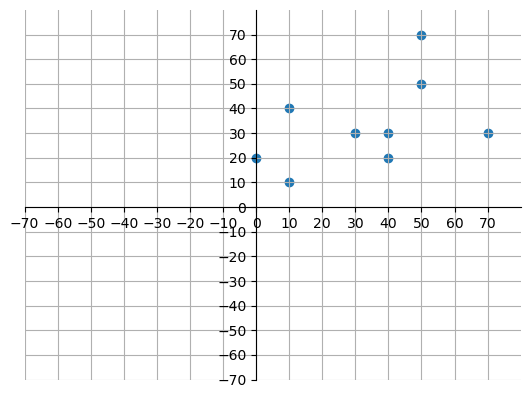

In [7]:
X = np.array([10,30,40,40,50,10,50,70,0])
Y = np.array([10,30,20,30,70,40,50,30,20])
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color(None)
ax.spines['top'].set_color(None)
plt.scatter(X,Y)
biggest_abs_x = np.max(abs(X))
biggest_abs_y = np.max(abs(Y))
plt.xticks(np.arange(-biggest_abs_x,biggest_abs_x+10,step = 10)) # plus 10 cause np.arange is exclusive
plt.yticks(np.arange(-biggest_abs_y,biggest_abs_y+10,step = 10))
plt.xlim(-biggest_abs_x, biggest_abs_x+10)
plt.ylim (-biggest_abs_x, biggest_abs_y+10)
plt.grid()
plt.show()

In [17]:
# finding xmean ymean
xmean = np.mean(X)
ymean = np.mean(Y) 
print(f'mean of x is {xmean} and mean of Y is {ymean}')

mean of x is 33.333333333333336 and mean of Y is 33.333333333333336



$$
\text{Cov}(F1, F2) = \frac{1}{n-1} \sum_{i=1}^{n} (F1_i - \bar{F2})(F2_i - \bar{F2})
$$


In [18]:
np.sum((X - np.mean(X))*(Y- np.mean(Y)))

1500.0

In [50]:
def sample_covariance(X,Y):
    return np.sum((X - np.mean(X))*(Y- np.mean(Y))) / (X.shape[0]-1)

In [20]:
sample_covariance(X,Y)

187.5

In [21]:
def covariance_in_lecture(X,Y):
    return np.sum((X - np.mean(Y))*(Y- np.mean(Y))) / (X.shape[0]-1)

In [22]:
covariance_in_lecture(X,Y)

187.5

In [23]:
X2 = np.array([1,-3,4,34,53,12,-15,27,30])
Y2 = np.array([1,3,2,-3,7,4,-5,3,2])

In [24]:
sample_covariance(X2,Y2)

38.81944444444444

In [25]:
covariance_in_lecture(X2,Y2)

38.81944444444445

### simplified covariance
when Number = 0 we get the simplified covariance.

$$
\text{Cov}(x, y) = \frac{1}{n-1} \sum_{i=1}^{n} x_i(y_i - \bar{y})
$$


In [47]:
def sample_covariance_simplified(X,Y):
    return np.sum(X *(Y- np.mean(Y))) / (X.shape[0]-1)

In [27]:
sample_covariance_simplified(X2,Y2)

38.819444444444436

so it turned out that mathematically we will get the same result no matter the value of the number we subtract


#### why does simplified covariance work?


first thing let see how the data will look like after subtacting $\bar{y}$ from y

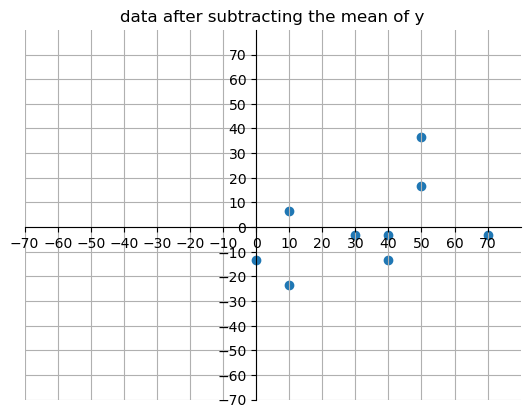

In [41]:
Y_scaled = Y - np.mean(Y)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color(None)
ax.spines['top'].set_color(None)
plt.scatter(X,Y_scaled)
biggest_abs_x = np.max(abs(X))
biggest_abs_y = np.max(abs(Y))
plt.xticks(np.arange(-biggest_abs_x,biggest_abs_x+10,step = 10)) # plus 10 cause np.arange is exclusive
plt.yticks(np.arange(-biggest_abs_y,biggest_abs_y+10,step = 10))
plt.xlim(-biggest_abs_x, biggest_abs_x+10)
plt.ylim (-biggest_abs_x, biggest_abs_y+10)
plt.grid()
plt.title('data after subtracting the mean of y')
plt.show()

covariance is a measure(estimator) how two variable relate to each other.
when covariance is postive then they increase and decrease together but when covariance is negative they tend to go on the opposite directons.

after subracting the mean from y value, now we will be able
to estimate if they increase together or not. 
by applying 
<b>
$$
 \frac{1}{n-1} \sum_{i=1}^{n} x_i * yscaled_i
$$

<b>the result(covariance) of previous example is 38.819444444444436.

##### trying negative covariance

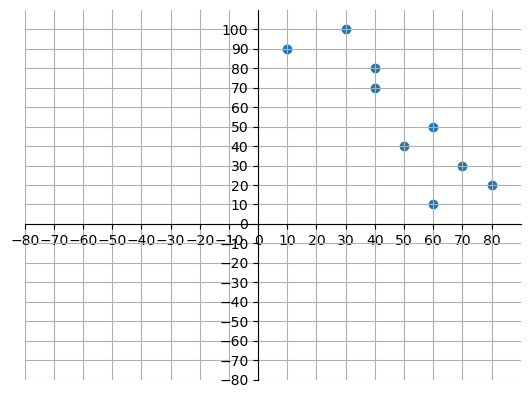

In [44]:
X = np.array([10,30,40,40,50,60,60,70,80])
Y = np.array([90,100,80,70,40,50,10,30,20])
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color(None)
ax.spines['top'].set_color(None)
plt.scatter(X,Y)
biggest_abs_x = np.max(abs(X))
biggest_abs_y = np.max(abs(Y))
plt.xticks(np.arange(-biggest_abs_x,biggest_abs_x+10,step = 10)) # plus 10 cause np.arange is exclusive
plt.yticks(np.arange(-biggest_abs_y,biggest_abs_y+10,step = 10))
plt.xlim(-biggest_abs_x, biggest_abs_x+10)
plt.ylim (-biggest_abs_x, biggest_abs_y+10)
plt.grid()
plt.show()

by looking at the data you can find that the covariance should be negative cause when x increases y decreases

now if you think of multiplying x and y you're going to get postive number so it does not work in this way.

but what you can do is subtracting the mean of x or y and then multiplying.


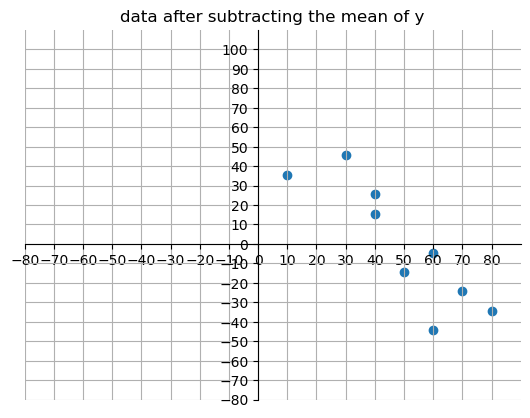

In [45]:
Y_scaled = Y - np.mean(Y)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color(None)
ax.spines['top'].set_color(None)
plt.scatter(X,Y_scaled)
biggest_abs_x = np.max(abs(X))
biggest_abs_y = np.max(abs(Y))
plt.xticks(np.arange(-biggest_abs_x,biggest_abs_x+10,step = 10)) # plus 10 cause np.arange is exclusive
plt.yticks(np.arange(-biggest_abs_y,biggest_abs_y+10,step = 10))
plt.xlim(-biggest_abs_x, biggest_abs_x+10)
plt.ylim (-biggest_abs_x, biggest_abs_y+10)
plt.grid()
plt.title('data after subtracting the mean of y')
plt.show()

covariance is a measure(estimator) how two variable relate to each other.
when covariance is postive then they increase and decrease together but when covariance is negative they tend to go on the opposite directons.

after subracting the mean from y value, now we will be able
to estimate if they increase together or not. 
by applying 
<b>
$$
 \frac{1}{n-1} \sum_{i=1}^{n} x_i * yscaled_i
$$

<b>the result(covariance) of previous example is -594.4444444444443.

In [48]:
sample_covariance_simplified(X,Y)

-594.4444444444443

In [51]:
sample_covariance(X,Y)

-594.4444444444443

## conclusion

<b> this is correct:
$$
\text{Cov}(x, y) = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - Number)(y_i - \bar{y})
$$

$$
Number\in{[-\infty,+\infty]}
$$

 <b> and this is correct (covariance is commutative) :

$$
\text{Cov}(x, y) = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})(y_i - Number)
$$

$$
Number\in{[-\infty,+\infty]}
$$

<b> so Number can be any value from $\bar{x}$ , $\bar{y} $ ,zero or any other number.

